# Circuit Diagram

In [2]:
%load_ext jupyter_tikz

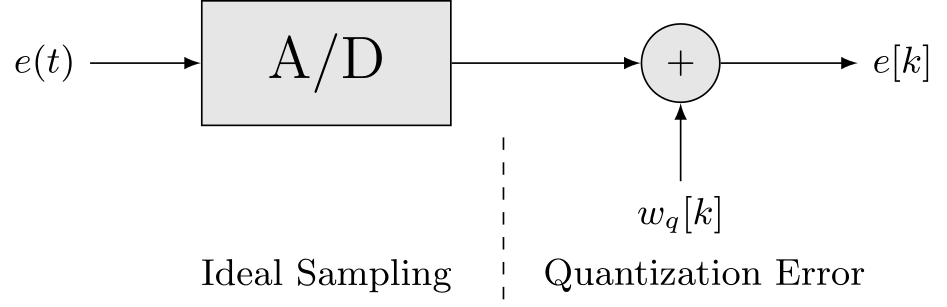

In [13]:
%%tikz -p=\include{prefix.tex} --dpi=300 -r -S quantization_model.png
\begin{tikzpicture}[auto, node distance=2cm]
    \node [input, name=input] {};
    \node [block, right of=input,yshift=0cm] (system){\Large A/D};
    \node [sum,right of=system, xshift=2cm] (sum){$+$};
    \node [input, below of=sum,yshift=1cm] (noise) {};
    \node [output, right of=sum, xshift=-0.5cm] (output) {};
    
    \draw [-latex] (input) node[left]{$e(t)$}  -- (system);
    \draw [-latex] (system)  -- (sum);
    \draw [-latex] (sum)  -- (output) node[right]{$e[k]$};
    \draw [-latex] (noise) node[below]{$w_q[k]$} -- (sum);

    \draw [draw, dashed] (3.5, -2.0) -- (3.5, -.55);
    \node at (2, -1.8) {Ideal Sampling};
    \node at (5.2, -1.8) {Quantization Error};

\end{tikzpicture}


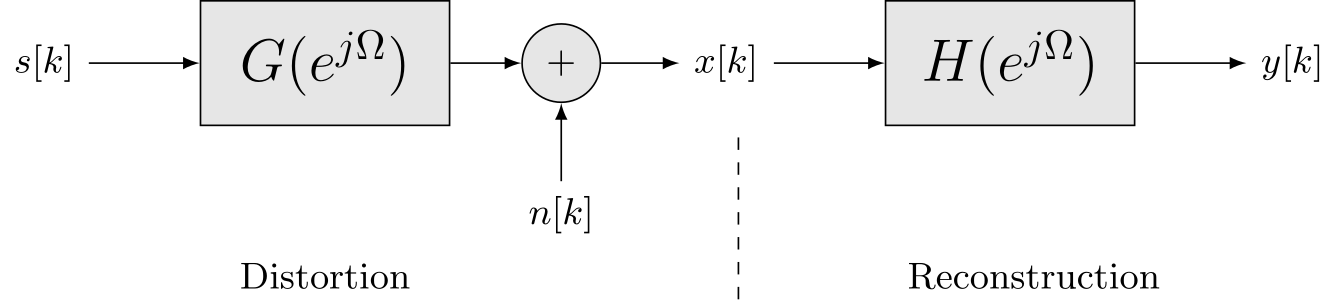

In [5]:
%%tikz -p=\include{prefix.tex} --dpi=300 -r -S wiener_filter.png
\begin{tikzpicture}[auto, node distance=2cm]
    \node [input, name=input] {};
    \node [block, right of=input,yshift=0cm] (system){\Large $G(e^{j \Omega})$};
    \node [sum,right of=system, xshift=1cm] (sum){$+$};
    \node [input, below of=sum,yshift=1cm] (noise) {};
    \node [input, right of=sum, xshift=-1cm] (observation1) {};
    \node [input, right of=observation1, xshift=-1.2cm] (observation) {};
    \node [block, right of=observation,yshift=0cm] (filter){\Large $H(e^{j \Omega})$};
    \node [output, right of=filter,xshift=0cm] (output) {};
    
    \draw [-latex] (input) node[left]{$s[k]$}  -- (system);
    \draw [-latex] (system)  -- (sum);
    \draw [-latex] (sum)  -- (observation1) node[right]{$x[k]$};
    \draw [-latex] (observation) -- (filter);
    \draw [-latex] (filter)  -- (output) node[right]{$y[k]$};
    \draw [-latex] (noise) node[below]{$n[k]$} -- (sum);

    \draw [draw, dashed] (5.5, -2.0) -- (5.5, -.55);
    \node at (2, -1.8) {Distortion};
    \node at (8, -1.8) {Reconstruction};

\end{tikzpicture}


# Signal distortion model

# Wiener filter setup

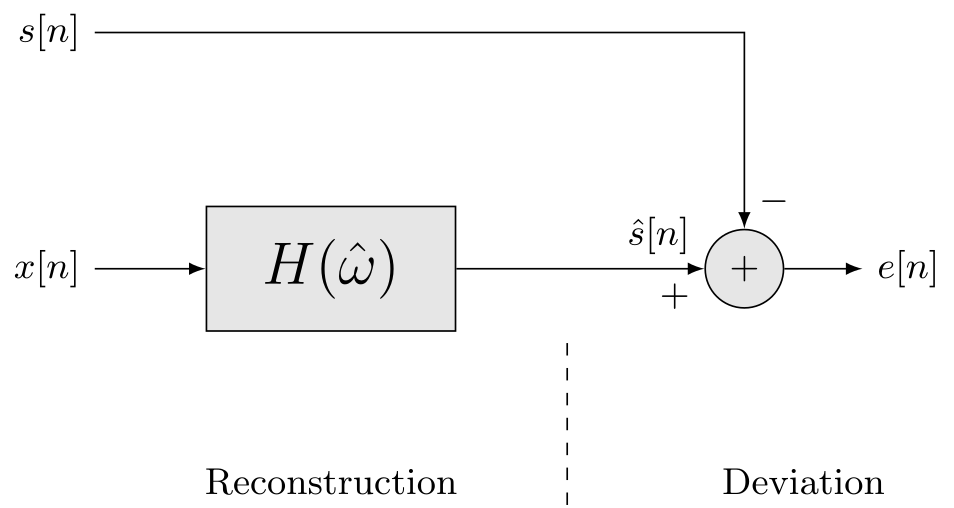

In [7]:
%%tikz -p=\include{prefix.tex} --dpi=300 -r -S wiener.png
\begin{tikzpicture}[auto, node distance=2cm]
                        
    \node [input, name=input] {};
    \node [input, above of=input, yshift=0cm] (source){};
    \node [block, right of=input,yshift=0cm] (filter){\Large $H(\hat{\omega})$};
    \node [sum, right of=filter, xshift=2.5cm](error_sum){$+$};
    \node [output, right of=error_sum,xshift=-1cm] (output) {};

    \draw [->] (source) node[left]{$s[n]$} -| (error_sum.north) node[above right]{$-$};
    \draw [-latex] (input) node[left]{$x[n]$} -- (filter);
    \draw [->] (filter) -- (error_sum.west) node[above left]{$\hat{s}[n]$} node[below left]{$+$};
    \draw [-latex] (error_sum)  -- (output) node[right]{$e[n]$};

    \draw [draw, dashed] (4, -2.0) -- (4, -.55);

    \node at (2, -1.8) {Reconstruction};
    \node at (6, -1.8) {Deviation};

\end{tikzpicture}

# Adaptive filter concept

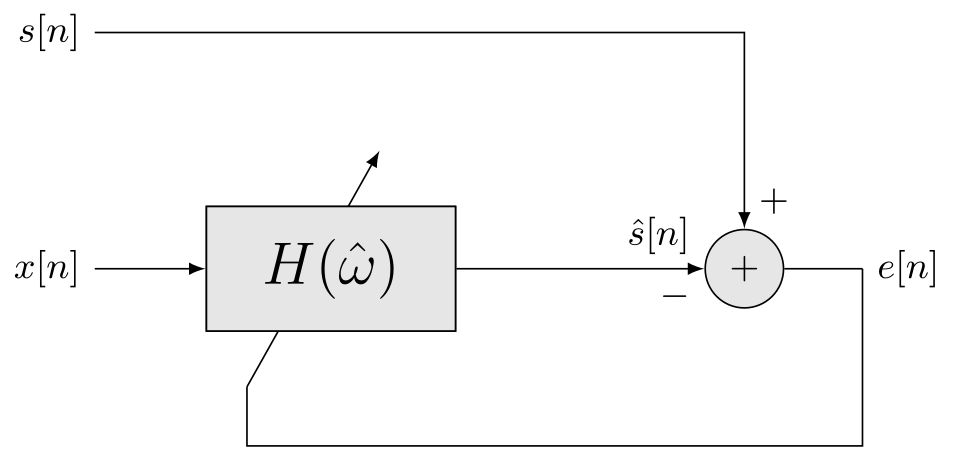

In [46]:
%%tikz -p=\include{prefix.tex} --dpi=300 -r -S adaptive_filter.png
\begin{tikzpicture}[auto, node distance=2cm]
                        
    \node [input, name=input] {};
    \node [input, above of=input, yshift=0cm] (source){};
    \node [block, right of=input,yshift=0cm] (filter){\Large $H(\hat{\omega})$};
    \node [sum, right of=filter, xshift=2.5cm](error_sum){$+$};
    \node [output, right of=error_sum,xshift=-1cm] (output) {};
    \node at ($(output.center)-(0,1.5)$) (branch_1) {};
    \node at ($(filter.west)-(-0.35,1.0)$) (branch_2) {};
    \node at ($(filter.east)-(0.65,-1.0)$) (branch_3) {};

    \draw [->] (source) node[left]{$s[n]$} -| (error_sum.north) node[above right]{$+$};
    \draw [-latex] (input) node[left]{$x[n]$} -- (filter);
    \draw [->] (filter) -- (error_sum.west) node[above left]{$\hat{s}[n]$} node[below left]{$-$};
    \draw [-] (error_sum)  -- (output) node[right]{$e[n]$};
    \draw [-] (output) -- (branch_1.center) -| (branch_2.center);
    \draw [->] (branch_2.center) -- (branch_3.center);
    \node [block, right of=input,yshift=0cm] (filter){\Large $H(\hat{\omega})$};

\end{tikzpicture}

# Adaptive prediction

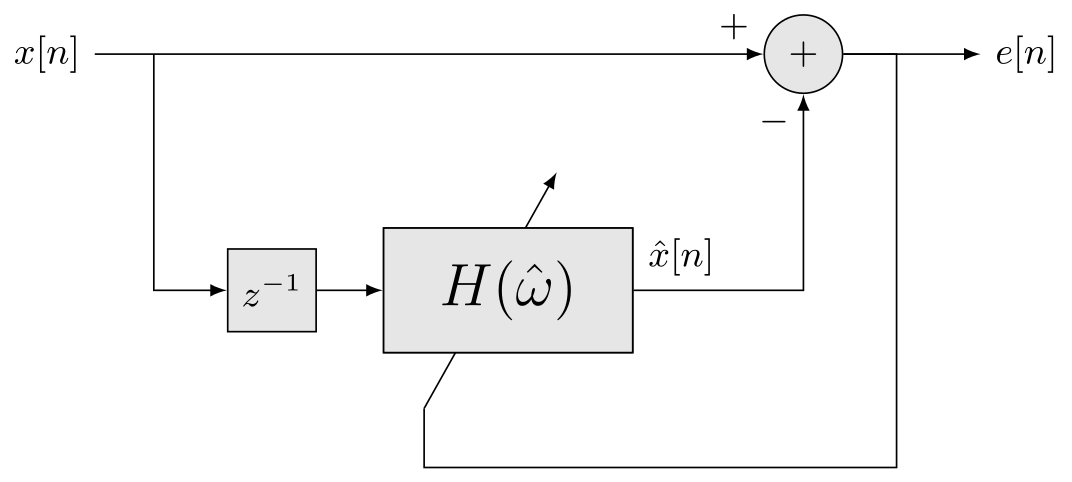

In [43]:
%%tikz -p=\include{prefix.tex} --dpi=300 -r -S prediction.png
\begin{tikzpicture}[auto, node distance=2cm]
                        
    \node [input, name=input] {};
    \node at ($(input.east)-(-0.5,0)$) (input_branch) {};
    \node [block, right of=input, minimum width=5mm, minimum height=7mm, yshift=-2cm, xshift=-0.5cm] (delay){$z^{-1}$};
    \node [block, right of=delay, yshift=0cm] (filter){\Large $H(\hat{\omega})$};
    \node [sum, right of=input, xshift=5cm](error_sum){$+$};
    \node [output, right of=error_sum,xshift=-0.5cm] (output) {};
                            
    \node at ($(filter.west)-(-0.35,1.5)$)  (branch_2) {};
    \node at ($(filter.west)-(-0.35,1.0)$) (branch_3) {};
    \node at ($(filter.east)-(0.65,-1.0)$) (branch_4) {};
    \node at ($(branch_2)-(-4,0)$) (branch_1) {};

    \draw [->] (input) node[left]{$x[n]$} -- (error_sum.west) node[above left]{$+$};
    \draw [->] (input_branch.center) |- (delay);
    \draw [->] (delay) -- (filter);
    \draw [->] (filter.east) node[above right]{$\hat{x}[n]$} -| (error_sum.south) node[below left]{$-$};
    \draw [->] (error_sum)  -- (output) node[right]{$e[n]$};
    \draw [-] (error_sum.east) -| (branch_1.center) -| (branch_2.center) -- (branch_3.center);
    \draw [->] (branch_3.center) -- (branch_4.center);
    %\draw [->] (filter.east) -- (pred_out) node[right]{$y[n]$};
    \node [block, right of=delay, yshift=0cm] (filter){\Large $H(\hat{\omega})$};


\end{tikzpicture}

# LMS prediction flowchart

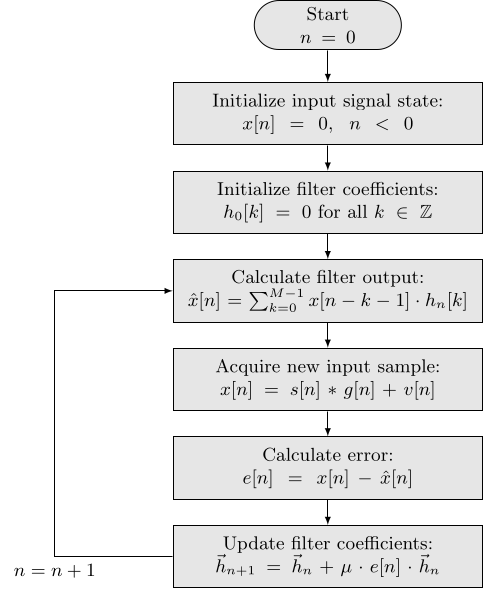

In [49]:
%%tikz -p=\include{prefix.tex} --dpi=300 -sc=0.5 -r -S prediction_flowchart.png
\begin{tikzpicture}[auto, node distance=1.5cm]
                        
    \node [draw, rounded rectangle, fill=gray!20, name=input, minimum height=7mm, text width=20mm, align=center] {Start\\ $n=0$};
    \node [block, below of=input, text width=5cm, align=center] (signal_init) {Initialize input signal state: \\$x[n] = 0, \ \ n<0$};
    \node [block, below of=signal_init, text width=5cm, align=center] (filter_init) {Initialize filter coefficients: \\$h_0[k] = 0 \text{ for all } k \in \mathbb{Z}$};
    \node [block, below of=filter_init, text width=5cm, align=center] (filter_output) {Calculate filter output: \\$\hat{x}[n]=\sum_{k=0}^{M-1}x[n-k-1]\cdot h_n[k]$};
    \node [block, below of=filter_output, text width=5cm, align=center] (get_sample) {Acquire new input sample: \\$x[n] = s[n]*g[n]+v[n]$};
    \node [block, below of=get_sample, text width=5cm, align=center] (get_error) {Calculate error: \\$e[n]=x[n] - \hat{x}[n]$};
    \node [block, below of=get_error, text width=5cm, align=center] (update_filter) {Update filter coefficients: \\$\vec{h}_{n+1}=\vec{h}_n  + \mu \cdot e[n] \cdot \vec{h}_n$};
    \node at ($(update_filter.west)-(2, 0)$) (feedback) {};


    \draw [->] (input) -- (signal_init);
    \draw [->] (signal_init) -- (filter_init);
    \draw [->] (filter_init) -- (filter_output);
    \draw [->] (filter_output) -- (get_sample);
    \draw [->] (get_sample) -- (get_error);
    \draw [->] (get_error) -- (update_filter);
    \draw [->] (update_filter.west) -- (feedback.center) node[below]{$n = n+1$} |- (filter_output.west);

\end{tikzpicture}